In [1]:
using Plots, ComplexPhasePortrait, Interact, ApproxFun
gr();

# M3M6: Methods of Mathematical Physics

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: Blackboard



# Lecture 3: Cauchy's integral formula and Taylor series


This lecture we cover

1. Deformation of contours
2. Cauchy's integral formula
    - Application: Numerical differentiation
3. Taylor series

## Deformation of contours

**Definition (Domain)** A _domain_ is a non-empty, open and connected set $D \subset {\mathbb C}$.

**Definition (Homotopic)** Two closed contours $\gamma_1 : [a,b] \rightarrow D$ and $\gamma_2 \rightarrow D$ in a domain $D$ are _homotopic_ if they can be continuously deformed to one-another while remaining in $D$. 

**Theorem (Deformation of closed contours)** Let $f(z)$ be holomorphic in a domain $D$. Let $\gamma_1$ and $\gamma_2$ be two homotopic contours. Then
$$
    \oint_{\gamma_1} f(z) dz = \oint_{\gamma_2} f(z) dz
$$   

**Definition (Simply connected)** A domain is _simply connected_ if every closed contour is homotoic to a point.

**Corollary (Deformation of contours on simply connected domains)** Let $f(z)$ be holomorphic in a simply-connected domain $D$. If $\gamma_1$ and $\gamma_2$ are two contours in $D$ with the same endpoints, then

$$
    \int_{\gamma_1} f(z) dz = \int_{\gamma_2} f(z) dz
$$   

In [2]:
f = Fun( z -> exp(z), Arc(0.,1.,(0,π/2)))  # Holomorphic!
f̃ = Fun( z -> exp(z), Segment(1,im))  # Holomorphic!

sum(f)  , sum(f̃)

(-2.177979522590906 + 0.8414709848078963im, -2.1779795225909053 + 0.8414709848078966im)

In [3]:
plot(domain(f); ratio=1.0, legend=false)
plot!(domain(f̃))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
 
 0.2 
 
 
 0.4 
 
 
 0.6 
 
 
 0.8 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 124.267,11.811 124.43,11.8111 124.755,11.8114 125.243,11.8124 125.893,11.8147 126.706,11.8193 127.681,11.8272 128.818,11.8397 130.117,11.8584 131.579,11.8849 
 133.202,11.9212 134.987,11.9695 136.932,12.0321 139.039,12.1117 141.306,12.2109 143.732,12.3329 146.318,12.4807 149.062,12.6578 151.964,12.8677 155.022,13.1142 
 158.235,13.4012 161.603,13.7328 165.123,14.1132 168.793,14.5469 172.613,15.0384 176.58,15.5924 180.691,16.2136 184.944,16.907 189.336,17.6774 193.864,18.53 
 198.525,19.4698 203.315,20.5018 208.23,21.6313 213.265,22.8631 218.417,24.2025 223.68,25.6542 229.048,27.2232 234.516,28.9141 240.079,30.7316 245.73,32.6799 
 251.461,34.7633 257.267,36.9855 263.141,39.3503 269.073,41.8608 275.057,44.52 281.085,47.3305 287.148,50.2944 293.237,53.4135 299.344,56.6889 305.46,60.1215 
 311.576,63.7116 317.683,67.4588 323.771,71.3625 329.831,75.4212 335.854,79.6331 341.832,83.9957 347.754,88.506 353.612,93.1604 359.398,97.9548 365.102,102.884 
 370.718,107.944 376.236,113.128 381.65,118.431 386.952,123.845 392.137,129.363 397.196,134.979 402.126,140.683 406.92,146.469 411.575,152.327 416.085,158.249 
 420.448,164.226 424.66,170.25 428.718,176.31 432.622,182.398 436.369,188.504 439.959,194.62 443.392,200.736 446.667,206.844 449.786,212.933 452.75,218.996 
 455.561,225.023 458.22,231.008 460.73,236.94 463.095,242.813 465.317,248.619 467.401,254.351 469.349,260.002 471.167,265.564 472.858,271.033 474.427,276.401 
 475.878,281.664 477.218,286.815 478.45,291.851 479.579,296.766 480.611,301.555 481.551,306.216 482.403,310.745 483.174,315.137 483.867,319.39 484.488,323.501 
 485.042,327.468 485.534,331.287 485.968,334.958 486.348,338.478 486.68,341.846 486.967,345.059 487.213,348.117 487.423,351.019 487.6,353.763 487.748,356.348 
 487.87,358.775 487.969,361.042 488.049,363.148 488.111,365.094 488.16,366.879 488.196,368.502 488.222,369.963 488.241,371.263 488.254,372.4 488.261,373.375 
 488.266,374.188 488.268,374.838 488.269,375.326 488.27,375.651 488.27,375.813 
 "/>
<polyline clip-path="url(#clip02)" style="stroke:#e26f46; stroke-width:1; stroke-opacity:1; fill:none" points="
 124.319,11.8826 124.891,12.4551 126.034,13.5982 127.744,15.3083 130.016,17.5801 132.842,20.4065 136.214,23.7785 140.121,27.6855 144.551,32.1152 149.49,37.0537 
 154.921,42.4855 160.829,48.3934 167.195,54.7589 173.998,61.562 181.217,68.7811 188.83,76.3938 196.812,84.3758 205.138,92.7023 213.783,101.347 222.718,110.282 
 231.917,119.481 241.349,128.913 250.986,138.55 260.796,148.36 270.75,158.314 280.815,168.379 290.96,178.524 301.154,188.718 311.363,198.927 321.557,209.121 
 331.702,219.266 341.767,229.331 351.721,239.285 361.531,249.095 371.168,258.732 380.6,268.164 389.798,277.362 398.734,286.298 407.378,294.943 415.705,303.269 
 423.687,311.251 431.3,318.864 438.519,326.083 445.322,332.886 451.687,339.251 457.595,345.159 463.027,350.591 467.966,355.53 472.395,359.959 476.302,363.866 
 479.674,367.238 482.501,370.065 484.772,372.336 486.483,374.047 487.626,375.19 488.198,375.762 
 "/>

## Orientation of contours

Contours are _oriented_: there is a notion of "left" and "right" inherited from $[a,b]$. For closed contours, there is as notion of positive/negative orientation:

**Definition (Positive/negative orientation)** Let $\gamma$ be a simple closed contour and $z$ in the interior of $\gamma$.  We say that $\gamma$ is _positively oriented_ if 
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = 1$$
It is _negatively oriented_ if the reversed contour $\gamma_{\rm reversed}(t) = \gamma(b+a-t)$ for $t \in [a,b]$ is positively oriented, or equivalentally
$${1 \over 2 \pi i} \oint_\gamma {d\zeta \over \zeta - z} = -1$$


In [4]:
sum(Fun(z -> 1/z, Circle()))/(2π*im)

1.0 + 1.1650838164520594e-16im

## Cauchy's integral formula

**Theorem (Cauchy integral formula)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then
$$
f(z) = {1 \over 2 \pi i} \oint_\gamma {f(\zeta) \over z - \zeta} d \zeta$$

In [22]:
γ = Circle()
ζ = Fun(γ)
sum(exp(ζ)/(ζ-0.1)) /(2π*im)  - exp(0.1)

0.0 - 0.0im

**Corollary (Cauchy integral formula for derivatives)** Suppose $f$ is holomorphic inside and on a positively oriented, simple, closed contour $\gamma$. Then $f$ is infinitely-differentiable at $z$ and 
$$
f^{(k)}(z) = {k! \over 2 \pi i} \oint_\gamma {f(\zeta) \over (z - \zeta)^{k+1}} d \zeta$$

In [34]:
k=10
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im)  - exp(z)

2.310482916101364e-10 - 0.0im

In [49]:
z = 0.1
k = 5
factorial(1.0k)*sum(exp(ζ)/(ζ-z)^(k+1))/(2π*im) - exp(z)

9.103828801926284e-15 - 0.0im

In [44]:
-sin(z)

-0.09983341664682815

In [37]:
plot(domain(ζ); ratio=1.0, legend=false)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -0.5 
 
 
 0.0 
 
 
 0.5 
 
 
 1.0 
 
 
 -0.75 
 
 
 -0.50 
 
 
 -0.25 
 
 
 0.00 
 
 
 0.25 
 
 
 0.50 
 
 
 0.75 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 494.961,193.812 493.929,174.46 490.847,155.327 485.748,136.63 478.69,118.58 469.755,101.384 459.041,85.2342 446.672,70.3149 432.787,56.7949 417.544,44.8273 
 401.115,34.5479 383.687,26.0729 365.456,19.4985 346.63,14.8991 327.421,12.3269 308.048,11.811 288.73,13.3573 269.686,16.9481 251.131,22.543 233.276,30.0783 
 216.324,39.4688 200.465,50.6081 185.88,63.37 172.735,77.6098 161.177,93.1663 151.339,109.863 143.331,127.511 137.244,145.91 133.147,164.852 131.087,184.122 
 131.087,203.502 133.147,222.772 137.244,241.714 143.331,260.113 151.339,277.761 161.177,294.458 172.735,310.015 185.88,324.254 200.465,337.016 216.324,348.156 
 233.276,357.546 251.131,365.082 269.686,370.676 288.73,374.267 308.048,375.813 327.421,375.298 346.63,372.725 365.456,368.126 383.687,361.552 401.115,353.077 
 417.544,342.797 432.787,330.83 446.672,317.31 459.041,302.39 469.755,286.241 478.69,269.044 485.748,250.995 490.847,232.298 493.929,213.165 494.961,193.812 
 
 "/>

In [31]:
k=3
z = 0.1
factorial(1.0k)*sum(ζ^2/(ζ-z)^(k+1))/(2π*im)  

-1.0661299151674564e-16 - 0.0im

### Application: Numerical differentiation

Calculating high-order derivatives using limits is numerically unstable. But the previous formula tells us that we can reduce a derivative to a contour integral.  The example above shows that it's still numerically unstable, but we can deform the integration contour, to make it stable! 

In [62]:
h=0.000000000001;(exp(0.1+h)-exp(0.1))/h -exp(0.1)

-5.4919363766892104e-5

In [66]:
k=100
r = 1.0k
g = Fun(ζ -> exp(ζ)/(ζ - 0.1)^(k+1), Circle(0.1,r))
factorial(1.0k)/(2π*im) * sum(g) - exp(0.1)

-7.771561172376096e-15 + 3.9236636455243204e-16im

In [67]:
plot(Circle(0.1,r))

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -50 
 
 
 0 
 
 
 50 
 
 
 100 
 
 
 -75 
 
 
 -50 
 
 
 -25 
 
 
 0 
 
 
 25 
 
 
 50 
 
 
 75 
 
<polyline clip-path="url(#clip02)" style="stroke:#009af9; stroke-width:1; stroke-opacity:1; fill:none" points="
 580.315,193.812 578.772,174.46 574.159,155.327 566.53,136.63 555.97,118.58 542.599,101.384 526.568,85.2342 508.061,70.3149 487.285,56.7949 464.476,44.8273 
 439.893,34.5479 413.815,26.0729 386.536,19.4985 358.366,14.8991 329.625,12.3269 300.637,11.811 271.731,13.3573 243.235,16.9481 215.471,22.543 188.755,30.0783 
 163.388,39.4688 139.659,50.6081 117.836,63.37 98.1659,77.6098 80.8723,93.1663 66.1509,109.863 54.1685,127.511 45.0608,145.91 38.9311,164.852 35.8488,184.122 
 35.8488,203.502 38.9311,222.772 45.0608,241.714 54.1685,260.113 66.1509,277.761 80.8723,294.458 98.1659,310.015 117.836,324.254 139.659,337.016 163.388,348.156 
 188.755,357.546 215.471,365.082 243.235,370.676 271.731,374.267 300.637,375.813 329.625,375.298 358.366,372.725 386.536,368.126 413.815,361.552 439.893,353.077 
 464.476,342.797 487.285,330.83 508.061,317.31 526.568,302.39 542.599,286.241 555.97,269.044 566.53,250.995 574.159,232.298 578.772,213.165 580.315,193.812 
 
 "/>
 
 
 
 
 y1

[Bournemann 2011](https://www-m3.ma.tum.de/foswiki/pub/M3/Allgemeines/FolkmarBornemannPublications/FoCM_Stability_Cauchy_Integrals.pdf) investigates this further and optimizes the radius.

## Taylor series


**Theorem (Taylor)** Suppose $f$ is holomorphic in a ball $B(z_0,r)$. Then inside this ball we have
$$
    f(z) = \sum_{k=0}^\infty {f^{(k)}(z_0) \over k!} (z-z_0)^k
$$    


Examples:
1. $e^z$
2. $1/(1-z)$
3. $\sec z$
4. $\sqrt z$

In [68]:
expⁿ = (n,z) -> sum(z^k/factorial(1.0k) for k=0:n)

(::#69) (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(15: "input-5" = 25 Any , "n", 25, "25", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(2, "2"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(39, "39"),Pair{Any,Any}(46, "46"),Pair{Any,Any}(25, "25"),Pair{Any,Any}(42, "42"),Pair{Any,Any}(29, "29"),Pair{Any,Any}(8, "8"),Pair{Any,Any}(20, "20"),Pair{Any,Any}(14, "14")…)), Any[], Any[], true, "horizontal")

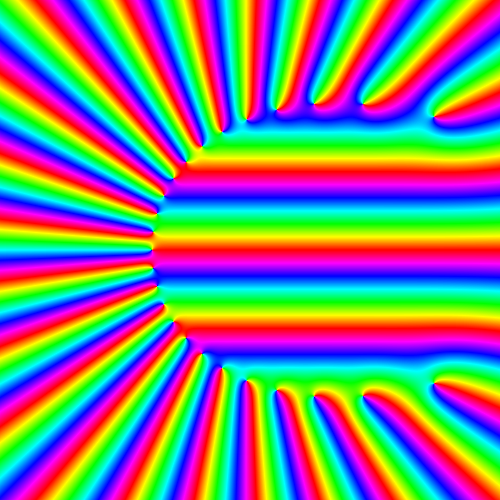

In [69]:
xx = yy = linspace(-20,20,500)
zz = xx' .+ im.*yy

@manipulate for n=0:50
    portrait(expⁿ.(n,zz))
end

In [70]:
geometricⁿ = (n,z) -> sum(z^k for k=0:n)

(::#77) (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(19: "input-6" = 15 Any , "n", 15, "15", 16, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(18, "18"),Pair{Any,Any}(30, "30"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(16, "16"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(21, "21"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10")…)), Any[], Any[], true, "horizontal")

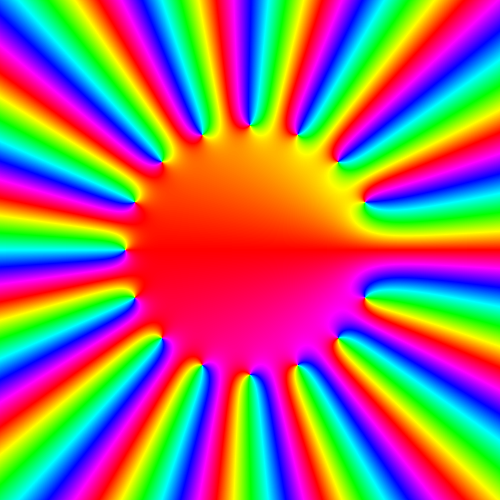

In [71]:
xx = yy = linspace(-2,2,500)
zz = xx' .+ im.*yy

@manipulate for n=0:30
    portrait(geometricⁿ.(n,zz))
end

In [12]:
function sqrtⁿ(n,z,z₀) 
    ret = sqrt(z₀)
    c = 0.5/ret*(z-z₀)
    for k=1:n
        ret += c
        c *= -(2k-1)/(2*(k+1)*z₀)*(z-z₀)
    end
    ret
end

sqrtⁿ (generic function with 1 method)

Interact.Options{:SelectionSlider,Any}(9: "input-3" = 1.4848484848484849 Any , "z₀", 1.4848484848484849, "1.4848484848484849", 50, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.030303030303030304"=>0.030303,"0.06060606060606061"=>0.0606061,"0.09090909090909091"=>0.0909091,"0.12121212121212122"=>0.121212,"0.15151515151515152"=>0.151515,"0.18181818181818182"=>0.181818,"0.21212121212121213"=>0.212121,"0.24242424242424243"=>0.242424,"0.2727272727272727"=>0.272727…), Dict{Any,Any}(Pair{Any,Any}(0.333333, "0.3333333333333333"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(0.484848, "0.48484848484848486"),Pair{Any,Any}(1.87879, "1.878787878787879"),Pair{Any,Any}(1.15152, "1.1515151515151516"),Pair{Any,Any}(1.60606, "1.606060606060606"),Pair{Any,Any}(1.57576, "1.5757575757575757"),Pair{Any,Any}(2.30303, "2.303030303030303"),Pair{Any,Any}(0.606061, "0.6060606060606061"),Pair{Any,Any}(0.030303, "0.030303030303030304")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(11: "input-4" = 10 Any , "n", 10, "10", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0"=>0,"1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9…), Dict{Any,Any}(Pair{Any,Any}(18, "18"),Pair{Any,Any}(2, "2"),Pair{Any,Any}(16, "16"),Pair{Any,Any}(11, "11"),Pair{Any,Any}(0, "0"),Pair{Any,Any}(7, "7"),Pair{Any,Any}(9, "9"),Pair{Any,Any}(10, "10"),Pair{Any,Any}(19, "19"),Pair{Any,Any}(17, "17")…)), Any[], Any[], true, "horizontal")

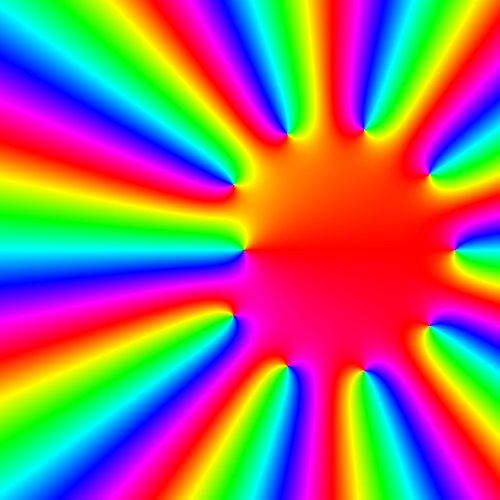

In [13]:
xx = yy = linspace(-5,5,500)
zz = xx' .+ im.*yy

@manipulate for z₀ = linspace(0.0,3.0,100), n=0:20
    portrait(sqrtⁿ.(n,zz,z₀))
end